In [1]:
#PARLAD DHUNGANA
#PREDICTING FUTURE CONSUMPTION OF HEATING OIL BY NEW COSTUMER
#LINEAR REGRESSION MODELING
#########################################################
#Importing librairies
import pandas as pd
import sklearn as sk
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.externals import joblib


/Users/parladdhungana/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
#Loading training data
Train_data = pd.read_csv("Chapter04DataSet.csv")#read csv file from the computer
Train_data.head()#printing just five line from the top

,Insulation,Temperature,Heating_Oil,Num_Occupants,Avg_Age,Home_Size
0,6,74,132,4,23.8,4
1,10,43,263,4,56.7,4
2,3,81,145,2,28.0,6
3,9,50,196,4,45.1,3
4,2,80,131,5,20.8,2


In [3]:
Train_data.describe()

,Insulation,Temperature,Heating_Oil,Num_Occupants,Avg_Age,Home_Size
count,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000
mean,6.214286,65.078818,197.394089,3.113300,42.706404,4.649425
std,2.768094,16.932425,56.248267,1.690605,15.051137,2.321226
min,2.000000,38.000000,114.000000,1.000000,15.100000,1.000000
25%,4.000000,49.000000,148.250000,2.000000,29.700000,3.000000
50%,6.000000,60.000000,185.000000,3.000000,42.900000,5.000000
75%,9.000000,81.000000,253.000000,4.000000,55.600000,7.000000
max,10.000000,90.000000,301.000000,10.000000,72.200000,8.000000


In [4]:
#Loading training data
Test_data = pd.read_csv("Chapter08DataSet.csv")#read csv file from the computer
Test_data#printing just five line from the top

,Insulation,Temperature,Num_Occupants,Avg_Age,Home_Size
0,5,69,10,70.1,7
1,5,80,1,66.7,1
2,4,89,9,67.8,7
3,7,81,9,52.4,6
4,4,58,8,22.9,7
...,...,...,...,...,...
42645,7,63,9,59.1,8
42646,7,84,1,43.6,5
42647,2,67,1,27.3,4
42648,8,58,1,65.7,3


In [5]:
Test_data.describe()

,Insulation,Temperature,Num_Occupants,Avg_Age,Home_Size
count,42650.000000,42650.000000,42650.000000,42650.000000,42650.000000
mean,5.989004,63.962087,5.489285,44.040131,4.495193
std,2.575511,15.313351,2.874612,16.736901,2.290911
min,2.000000,38.000000,1.000000,15.000000,1.000000
25%,4.000000,51.000000,3.000000,29.500000,3.000000
50%,6.000000,64.000000,5.000000,44.100000,4.000000
75%,8.000000,77.000000,8.000000,58.600000,6.000000
max,10.000000,90.000000,10.000000,73.000000,8.000000


In [6]:
Train_data.duplicated().any()# checking for any duplicates data in the dataset

False

In [7]:
print("Number of duplicated records in the data sets = ",Train_data.duplicated().sum())

Number of duplicated records in the data sets =  0


In [8]:
Train_data = Train_data.drop_duplicates()#removing duplicate data from the data set
#Test_data.head()

In [9]:
Train_data.shape

(1218, 6)

In [10]:
Test_data.shape

(42650, 5)

In [11]:
Test_data.duplicated().any()

True

In [12]:
print("Number of duplicated records in the data sets = ",Test_data.duplicated().sum())

Number of duplicated records in the data sets =  36


In [13]:
Test_data = Test_data.drop_duplicates()#removing duplicate data from the data set
#Test_data.head()

In [14]:
Test_data.shape

(42614, 5)

In [15]:
Test_data.isnull().any()

Insulation       False
Temperature      False
Num_Occupants    False
Avg_Age          False
Home_Size        False
dtype: bool

In [16]:
Train_data.isnull().any()

Insulation       False
Temperature      False
Heating_Oil      False
Num_Occupants    False
Avg_Age          False
Home_Size        False
dtype: bool

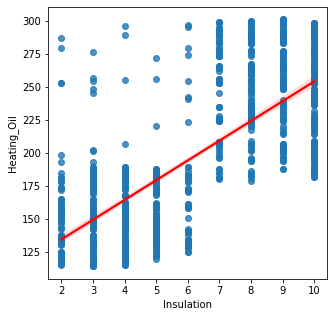

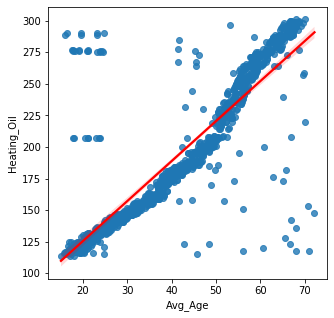

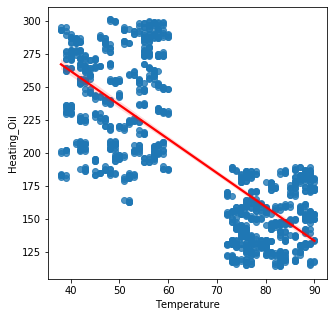

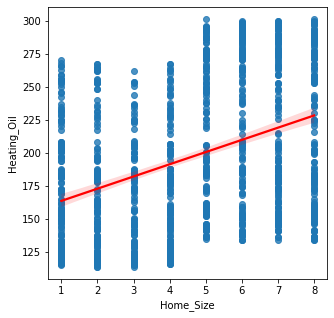

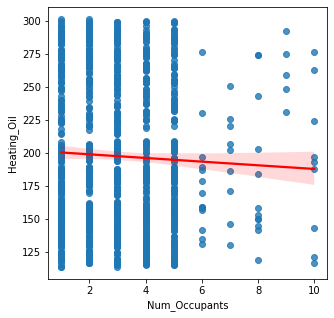

In [17]:
# Plot regression line on insulation rating to visualize it as predictor a of Heating Oil
width = 5
height = 5
plt.figure(figsize=(width, height))
sns.regplot(x='Insulation', y='Heating_Oil', data=Train_data, line_kws={'color':'red'})

plt.figure(figsize=(width, height))
sns.regplot(x='Avg_Age', y='Heating_Oil', data=Train_data, line_kws={'color':'red'})

plt.figure(figsize=(width, height))
sns.regplot(x='Temperature', y='Heating_Oil', data=Train_data, line_kws={'color':'red'})

plt.figure(figsize=(width, height))
sns.regplot(x='Home_Size', y='Heating_Oil', data=Train_data, line_kws={'color':'red'})

plt.figure(figsize=(width, height))
sns.regplot(x='Num_Occupants', y='Heating_Oil', data=Train_data, line_kws={'color':'red'})


plt.show()




Data is widely spread from regression line and may need to be transformed. A weak positive correlation is also shown.

Now we will visualize the variance throughout the range of years insulation rating data data

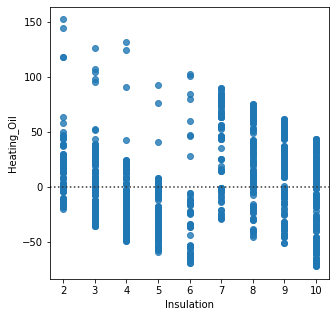

In [18]:
# Plot variance of insulation
width = 5
height = 5
plt.figure(figsize=(width, height))
sns.residplot(Train_data['Insulation'], Train_data['Heating_Oil'])
plt.show()

There is slightly more variance in Heating_Oil with increased Insulation rating.



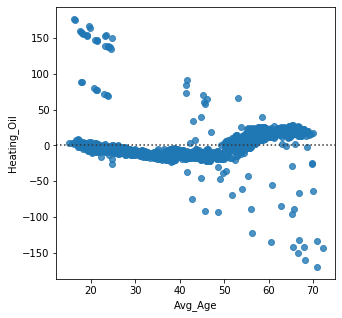

In [19]:
# Plot variance Avg_Age
width = 5
height = 5 
plt.figure(figsize=(width, height))
sns.residplot(Train_data['Avg_Age'], Train_data['Heating_Oil'])
plt.show()

High Veriance of Heating_Oil with Average_Age of occupents

Now that numerical values are assigned to all features we can see the correlation between all of them

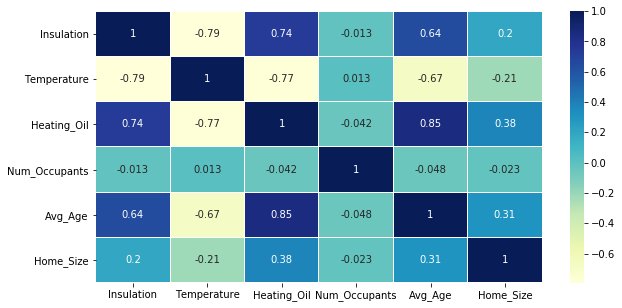

In [20]:
# Plot heatmap of all data with correlation coefficients visible
Train_data_corr = Train_data.corr()
plt.subplots(figsize=(10,5))
sns.heatmap(Train_data_corr, cmap='YlGnBu', linewidth=.005, annot=True)

we already figure out consumption of heating oil and number of occupents do not 
have correlation or very weak negative correlation. Thus, we remove the number of occupants. It is
not a statistically significant predictor of heating oil usage in this data set

In [21]:
Train_data = Train_data.drop("Num_Occupants",axis = 1)
Train_data


,Insulation,Temperature,Heating_Oil,Avg_Age,Home_Size
0,6,74,132,23.8,4
1,10,43,263,56.7,4
2,3,81,145,28.0,6
3,9,50,196,45.1,3
4,2,80,131,20.8,2
...,...,...,...,...,...
1213,7,56,264,58.2,5
1214,5,78,129,22.5,1
1215,5,77,138,26.8,1
1216,3,89,156,34.0,2


In [22]:
# Assign salary to "y" and all other features to "X". Split into training and testing variables.
X = Train_data[Train_data.loc[ : , Train_data.columns != 'Heating_Oil'].columns]
Y = Train_data[['Heating_Oil']]
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [23]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_Train, Y_Train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
#rechecking the shape of X_Train and Y_Train
Y_Train.shape, X_Train.shape

((974, 1), (974, 4))

In [25]:
# Predicting the result of 5 insulation rating
y_pred = regressor.predict(X_Train)
# View coefficients of linear regression object
print(regressor.intercept_)
print(regressor.coef_)


[129.88102544]
[[ 3.37028078 -0.81668523  1.99633262  3.03630403]]


In [26]:
#Printing first five prediction
print(y_pred[0:5])

[[122.69977975]
 [156.27108533]
 [128.43489681]
 [272.58017191]
 [157.47421739]]


In [27]:
y_pred.shape

(974, 1)

In [28]:
# Print MSE of training data
print("The mean squared error of our prediciton model is:", mean_squared_error(Y_Train, y_pred))

The mean squared error of our prediciton model is: 553.3924060229521


In [29]:
# Store linear regression predictions in variable
y_pred_test = regressor.predict(X_Test)

# View first 5 predictions
y_pred_test[0:5]

array([[265.08284163],
       [237.9146066 ],
       [246.99085079],
       [119.57288303],
       [260.30793126]])

In [30]:
X_Test.shape

(244, 4)

In [31]:
# Print MSE or loss function of training data
print("The mean squared error of our test set predicitons is:", mean_squared_error(Y_Test, y_pred_test))

The mean squared error of our test set predicitons is: 646.5033471077796


In [32]:
res = Y_Train - y_pred
res

,Heating_Oil
244,2.300220
541,3.728915
268,-11.434897
205,12.419828
632,15.525783
...,...
715,-0.458833
905,-14.094415
1096,37.651882
235,12.636473


In [33]:
print("Sum of the Residual:",res.sum())

Sum of the Residual: Heating_Oil   -2.629008e-11
dtype: float64


In [34]:
#Adding Three columns Actual_Heating_Oil, Predicting_Heating_Oil, and Residual in X_Train Data set
X_Train.assign(**{'Actual Heating_Oil': Y_Train, 'Predicted_Heating_Oil': y_pred, 'Residual': res})
New_X_Train = X_Train
New_X_Train




,Insulation,Temperature,Avg_Age,Home_Size
244,2,81,21.6,3
541,5,84,36.1,2
268,3,74,18.4,4
205,10,47,64.7,6
632,4,85,38.8,2
...,...,...,...,...
715,10,44,56.9,6
905,7,57,47.1,4
1096,8,56,58.6,7
235,3,86,37.8,4


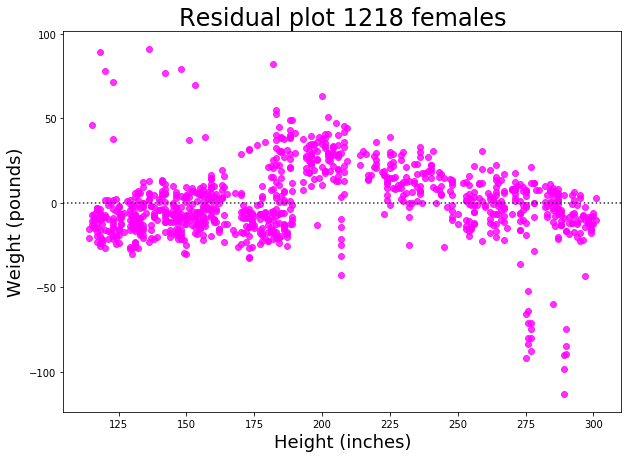

In [35]:
#ploting residual
import seaborn as sns

# dataframe containing only females
#df_females = df[df['Gender'] == 'Female'].sample(500)

# residual plot 500 females
fig = plt.figure(figsize = (10, 7))
sns.residplot(Y_Train, y_pred, color='magenta')

# title and labels
plt.title('Residual plot 1218 females', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18);

In [36]:
# Print accuracy score using 5-fold cross validation
scores = cross_val_score(regressor, X_Test, Y_Test, cv=5)
print("5-Fold Cross Validation Accuracy (test data):", (np.mean(scores)), (np.std(scores)))


5-Fold Cross Validation Accuracy (test data): 0.8055931379161457 0.02743255530809648


In [37]:
#Residual = Predicted value - Actual Value
#Residual should be 0 if our prediction is good, otherwise is not. 

residual = y_pred - Y_Train
print("Error: ",residual.sum(),"Unit")

Error:  Heating_Oil    2.629008e-11
dtype: float64 Unit


In [38]:
#Removing number of occupents from the data set
Test_data = Test_data.drop("Num_Occupants",axis = 1)
Test_data

,Insulation,Temperature,Avg_Age,Home_Size
0,5,69,70.1,7
1,5,80,66.7,1
2,4,89,67.8,7
3,7,81,52.4,6
4,4,58,22.9,7
...,...,...,...,...
42645,7,63,59.1,8
42646,7,84,43.6,5
42647,2,67,27.3,4
42648,8,58,65.7,3


In [39]:
#Calculating Estimate Heating Oil consumption of New Customer
y_pred_test = regressor.predict(Test_data)
y_pred_test[0:5]

array([[251.57819307],
       [217.58930039],
       [227.28264259],
       [210.14714041],
       [162.96455021]])

In [42]:
#Adding one columns Predicting_Heating_Oil Test_Data set
#Test_data.assign(**{'Predicted_Heating_Oil': y_pred_test})
#Test_data


Test_data['Predicted_Heating_Oil'] = y_pred_test
Test_data

,Insulation,Temperature,Avg_Age,Home_Size,Predicted_Heating_Oil
0,5,69,70.1,7,251.578193
1,5,80,66.7,1,217.589300
2,4,89,67.8,7,227.282643
3,7,81,52.4,6,210.147140
4,4,58,22.9,7,162.964550
...,...,...,...,...,...
42645,7,63,59.1,8,244.295511
42646,7,84,43.6,5,187.093054
42647,2,67,27.3,4,148.548773
42648,8,58,65.7,3,249.743493


In [ ]:
print("Total ",y_pred_test.sum().round(),
      "Unit of Heating Oil need to keep in stock in order to meed new customer demand")

In [ ]:
Test_data.shape